In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv(r"C:\Users\USER\PycharmProjects\DSGP-Component 2\data\processed_clean.csv")
df.head()


,depart_time,duration,waiting_time,route_length,time_loss,travel_speed_kmh,congestion_ratio,efficiency_score_from_perf,delay_ratio,efficiency_category,depart_time_bin
0,5.0,69.0,0.0,637.42,15.78,33.256696,0.000000,9.237971,0.228696,medium,0
1,15.0,60.0,10.0,414.60,23.78,24.876000,0.166667,6.910000,0.396333,medium,1
2,0.0,94.0,5.0,789.03,25.83,30.218170,0.053191,8.393936,0.274787,medium,0
3,48.0,62.0,14.0,478.15,28.45,27.763548,0.225806,7.712097,0.458871,medium,3
4,98.0,12.0,0.0,84.57,3.51,25.371000,0.000000,7.047500,0.292500,medium,6


In [4]:
# Example bins for short, medium, long trips
bins = [0, 5, 15, df['route_length'].max()]  # adjust values based on your data
labels = ['short', 'medium', 'long']
# Use quantiles to create balanced categories
df['trip_distance_category'] = pd.qcut(df['route_length'], q=3, labels=['short', 'medium', 'long'])
df['trip_distance_category'].value_counts()



trip_distance_category
medium    1330
short     1329
long      1329
Name: count, dtype: int64

In [5]:
# Features (input variables)
X = df[[
    "route_length",
    "duration",
    "waiting_time",
    "travel_speed_kmh",
    "depart_time_bin",
    "congestion_ratio",
    "delay_ratio"
]]

# Target (output variable)
y = df["trip_distance_category"]


In [6]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # short=0, medium=1, long=2


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:
results = {}

In [10]:
# 1. Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)
results["Decision Tree"] = accuracy_score(y_test, pred_dt)

In [11]:
# 2. Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
pred_lr = lr.predict(X_test_scaled)
results["Logistic Regression"] = accuracy_score(y_test, pred_lr)

In [12]:
# 3. Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
results["Random Forest"] = accuracy_score(y_test, pred_rf)


In [13]:
# 4. Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
pred_gb = gb.predict(X_test)
results["Gradient Boosting"] = accuracy_score(y_test, pred_gb)

In [14]:
print("Model C Results (Accuracy):")
for model, score in results.items():
    print(f"{model}: {score:.4f}")


Model C Results (Accuracy):
Decision Tree: 0.9987
Logistic Regression: 0.9912
Random Forest: 1.0000
Gradient Boosting: 0.9987


In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [16]:
# --- Train/Test Accuracy ---
train_acc = accuracy_score(y_train, rf.predict(X_train))
test_acc = accuracy_score(y_test, rf.predict(X_test))

print("Random Forest Accuracy:")
print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

Random Forest Accuracy:
Train Accuracy: 1.0
Test Accuracy: 1.0


In [17]:
# --- 5-Fold Cross-Validation ---
cv_scores = cross_val_score(rf, X, y_encoded, cv=5, scoring='accuracy')
print("\n5-Fold CV Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


5-Fold CV Accuracy Scores: [1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0


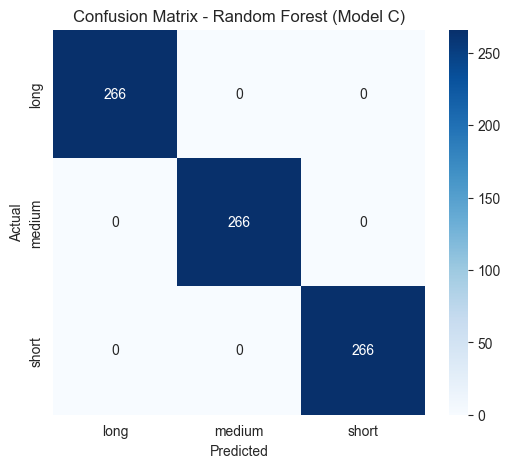

In [19]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on test set
y_pred = rf.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest (Model C)")
plt.show()


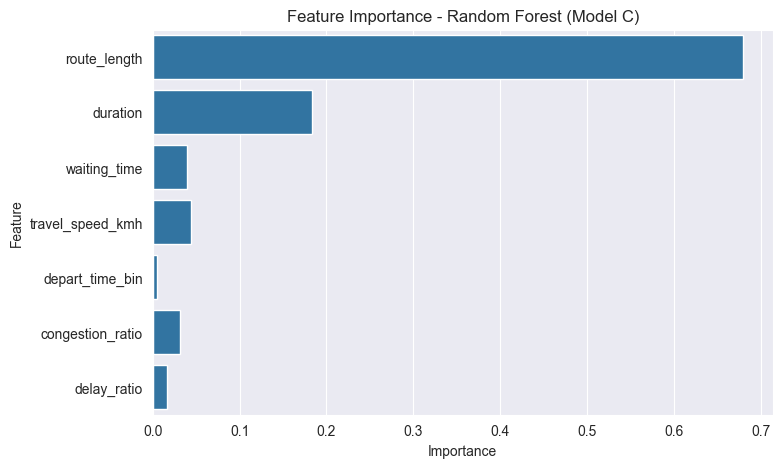

In [20]:
# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance - Random Forest (Model C)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()
